In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [3]:
data_fake['label'] = 0  
data_true['label'] = 1

In [4]:
data = pd.concat([data_fake, data_true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
x = data['text']  
y = data['label'] 

In [6]:
vectorization = TfidfVectorizer(stop_words='english')
x = vectorization.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


C_values: [0.01, 0.1, 1, 10, 100]
Accuracies: [0.9444320712694878, 0.9707126948775056, 0.9870824053452116, 0.9930957683741648, 0.993652561247216]
Length of C_values: 5
Length of accuracies: 5


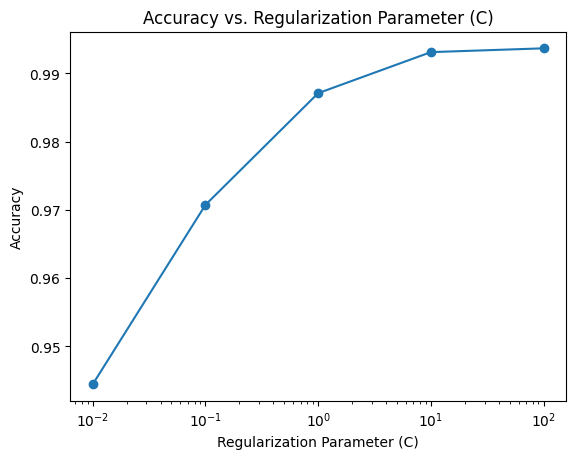

In [8]:
# Implementing logistic regression with different C values (regularization parameter)
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []  # Start with an empty list

for C in C_values:
    model = LogisticRegression(C =C, solver='lbfgs', max_iter=1000)
    for epoch in range(10):
        model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Append the accuracy to the list
    
print("C_values:", C_values)
print("Accuracies:", accuracies)
print("Length of C_values:", len(C_values))
print("Length of accuracies:", len(accuracies))

# Plotting the accuracies vs regularization parameter (C)
plt.plot(C_values, accuracies, marker='o')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use log scale for C values
plt.show()
    

Accuracy with 10 trees: 0.8956570155902005
n_estimators_list: [10, 50, 100, 150]
Accuracies: [0.8956570155902005]
Length of n_estimators_list: 4
Length of accuracies: 1
Accuracy with 50 trees: 0.9624721603563474
n_estimators_list: [10, 50, 100, 150]
Accuracies: [0.8956570155902005, 0.9624721603563474]
Length of n_estimators_list: 4
Length of accuracies: 2
Accuracy with 100 trees: 0.9628062360801781
n_estimators_list: [10, 50, 100, 150]
Accuracies: [0.8956570155902005, 0.9624721603563474, 0.9628062360801781]
Length of n_estimators_list: 4
Length of accuracies: 3
Accuracy with 150 trees: 0.9697104677060133
n_estimators_list: [10, 50, 100, 150]
Accuracies: [0.8956570155902005, 0.9624721603563474, 0.9628062360801781, 0.9697104677060133]
Length of n_estimators_list: 4
Length of accuracies: 4


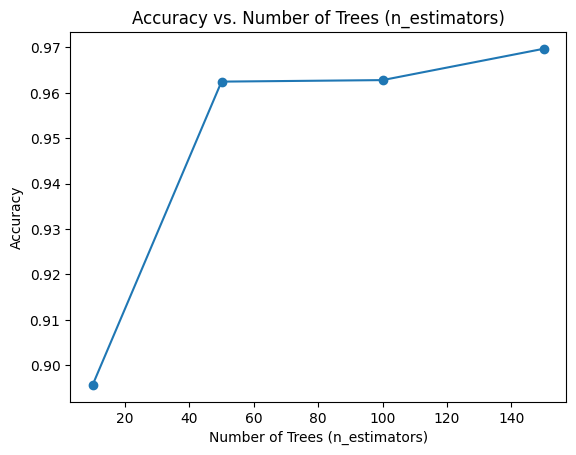

In [9]:
# Implementing Random Forest with different n_estimators (trees)
n_estimators_list = [10, 50, 100, 150]
accuracies = []  # Ensure accuracies is initialized as an empty list

# Loop through different values of n_estimators
for n_estimators in n_estimators_list:
    # Define the model with different n_estimators
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, random_state=42)
    
    # Fit the model
    for epoch in range(10):
        model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Append the accuracy to the list
    print(f'Accuracy with {n_estimators} trees: {accuracy}')
    
    # Check lengths before plotting
    print(f"n_estimators_list: {n_estimators_list}")
    print(f"Accuracies: {accuracies}")
    print(f"Length of n_estimators_list: {len(n_estimators_list)}")
    print(f"Length of accuracies: {len(accuracies)}")
    
    
    # Plotting the accuracies vs n_estimators
if len(n_estimators_list) == len(accuracies):  # Ensure the dimensions match
    plt.plot(n_estimators_list, accuracies, marker='o')
    plt.title('Accuracy vs. Number of Trees (n_estimators)')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel('Accuracy')
    plt.show()
else:
    print("Error: Lengths of n_estimators_list and accuracies do not match.")
    
    

Accuracy with max_depth=2: 0.9946547884187082
Accuracy with max_depth=3: 0.994988864142539
Accuracy with max_depth=5: 0.9952115812917595
Accuracy with max_depth=10: 0.9948775055679288
Accuracy with max_depth=20: 0.994988864142539


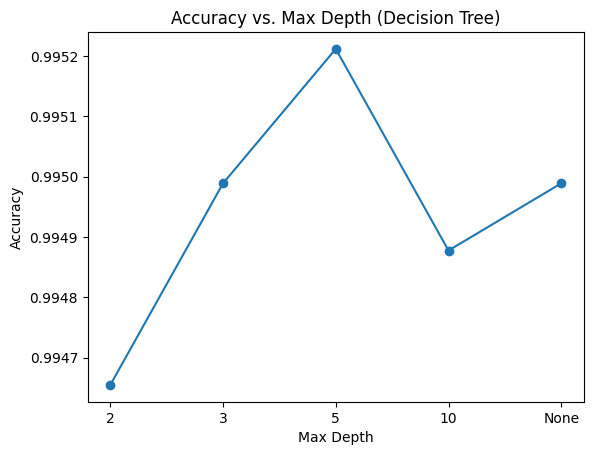

In [10]:
# Implementing Decision Tree with different  parameters for experimentation
max_depth_list = [2, 3, 5, 10,20]  # Experiment with different max depths
accuracies = []

# Loop through different max_depth values to simulate "epochs" or varying parameters
for max_depth in max_depth_list:
    # Define the model with different max_depth values
    model = DecisionTreeClassifier(max_depth=max_depth, criterion='gini', random_state=42)
    
    # Fit the model
    for epoch in range(10):
        model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with max_depth={max_depth}: {accuracy}')

# Plotting the accuracies vs max_depth
max_depth_labels = ['2', '3', '5', '10', 'None']
plt.plot(max_depth_labels, accuracies, marker='o')
plt.title('Accuracy vs. Max Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

Accuracy with alpha=0.1: 0.9412026726057906
Accuracy with alpha=0.5: 0.9375278396436526
Accuracy with alpha=1.0: 0.9361915367483297
Accuracy with alpha=2.0: 0.9341870824053452
Accuracy with alpha=5.0: 0.9342984409799554


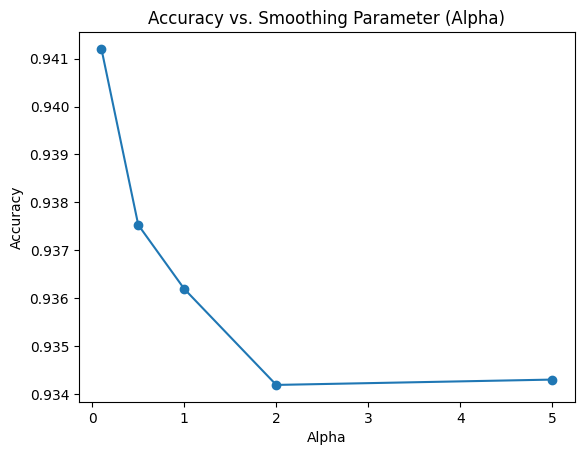

In [11]:
# Implementation Naive Bayes with different parameter values for alpha (smoothing parameter)
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]
accuracies = []

# Loop through different alpha values to simulate "epochs" or parameter tuning
for alpha in alpha_values:
    # Define the model with different alpha values
    model = MultinomialNB(alpha=alpha)
    
    # Fit the model
    for epoch in range(10):
        model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with alpha={alpha}: {accuracy}')

# Plotting the accuracies vs alpha values
plt.plot(alpha_values, accuracies, marker='o')
plt.title('Accuracy vs. Smoothing Parameter (Alpha)')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

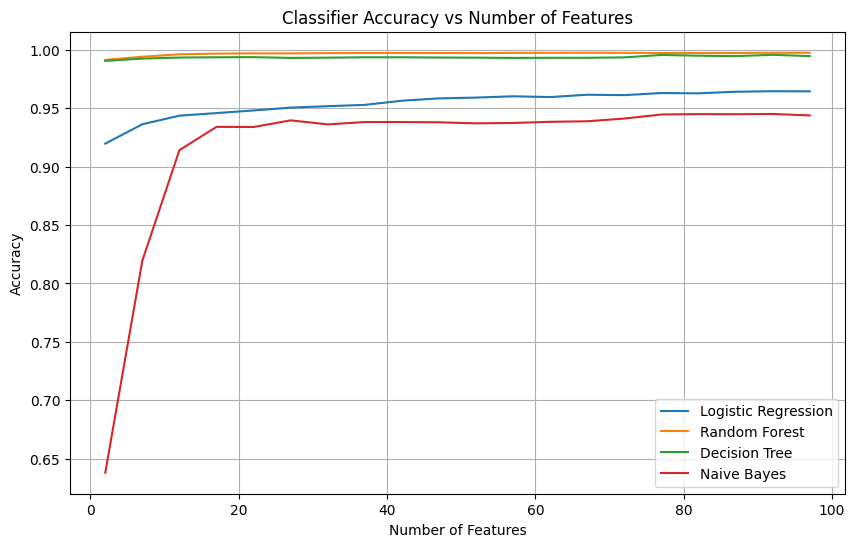

In [12]:
from sklearn.feature_selection import SelectKBest, chi2
# Classifiers to test
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Number of features to test (you can modify this as per your dataset)
num_features = np.arange(2, 100, 5)
results = {
    classifier: []
    for classifier in classifiers
}

# Perform feature selection and model evaluation
for k in num_features:
    selector = SelectKBest(chi2, k=k)
    x_train_kbest = selector.fit_transform(x_train, y_train)
    x_test_kbest = selector.transform(x_test)
    
    for name, classifier in classifiers.items():
        model = classifier.fit(x_train_kbest, y_train)
        y_pred = model.predict(x_test_kbest)
        acc = accuracy_score(y_test, y_pred)
        results[name].append(acc)

# Plotting the results
plt.figure(figsize=(10, 6))
for name, acc in results.items():
    plt.plot(num_features, acc, label=name)

plt.title('Classifier Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
model_LR = LogisticRegression()
model_RFC = RandomForestClassifier()
model_DTC = DecisionTreeClassifier()
model_MNB = MultinomialNB()

In [14]:
models = {
    "Logistic Regression": model_LR,
    "RandomForestClassifier": model_RFC,
    "DecisionTreeClassifier": model_DTC,
    "MultinomialNB": model_MNB
}

In [15]:
 def output_label(n):
    return "Fake News" if n == 0 else "Not Fake News"

In [16]:
  def manual_testing(news):
    news = [news]
    new_def_test = pd.DataFrame({'title': news})
    new_xv_test = vectorization.transform(new_def_test['title'])

    # Ensure that all models are fitted before predictions
    if not hasattr(models['Logistic Regression'], 'C_values'):
        print("Fitting Logistic Regression model...")
        models['Logistic Regression'].fit(x_train, y_train)
    
    if not hasattr(models['RandomForestClassifier'], 'n_estimators_list_'):
        print("Fitting RandomForestClassifier model...")
        models['RandomForestClassifier'].fit(x_train, y_train)

    if not hasattr(models['DecisionTreeClassifier'], 'max_depth_list_'):
        print("Fitting DecisionTreeClassifier model...")
        models['DecisionTreeClassifier'].fit(x_train, y_train)

    if not hasattr(models['MultinomialNB'], 'alpha_values'):
        print("Fitting MultinomialNB model...")
        models['MultinomialNB'].fit(x_train, y_train)
    
    # Predictions from all models
    pred_LR = models['Logistic Regression'].predict(new_xv_test)
    pred_RFC = models['RandomForestClassifier'].predict(new_xv_test)
    pred_DTC = models['DecisionTreeClassifier'].predict(new_xv_test)
    pred_MNB = models['MultinomialNB'].predict(new_xv_test)

    # Output for each model
    return f"LR: {output_label(pred_LR[0])}, RFC: {output_label(pred_RFC[0])}, DTC: {output_label(pred_DTC[0])}, MNB: {output_label(pred_MNB[0])}"

In [17]:
news = str("WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€")
print(manual_testing(news))

Fitting Logistic Regression model...
Fitting RandomForestClassifier model...
Fitting DecisionTreeClassifier model...
Fitting MultinomialNB model...
LR: Not Fake News, RFC: Not Fake News, DTC: Not Fake News, MNB: Not Fake News


In [18]:
news = str("Drunk Bragging Trump Staffer Started Russian Collusion Investigation")
print(manual_testing(news))

Fitting Logistic Regression model...
Fitting RandomForestClassifier model...
Fitting DecisionTreeClassifier model...
Fitting MultinomialNB model...
LR: Fake News, RFC: Fake News, DTC: Fake News, MNB: Fake News


In [19]:
news = str("Hello how are you")
print(manual_testing(news))

Fitting Logistic Regression model...
Fitting RandomForestClassifier model...
Fitting DecisionTreeClassifier model...
Fitting MultinomialNB model...
LR: Fake News, RFC: Fake News, DTC: Fake News, MNB: Fake News


In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

# Load your datasets
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

# Label the datasets (0 for true news, 1 for fake news)
data_fake['label'] = 1
data_true['label'] = 0

# Combine datasets
data = pd.concat([data_fake, data_true], axis=0).reset_index(drop=True)

# Features and labels
X = data['text']  # Assuming 'text' is the column with the news content
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train a simple Decision Tree Classfier model
model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)

# Save the model and vectorizer to pickle files
with open('model1.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.
